In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
from IPython.html.widgets import *
sns.set_style('white')

C:\Users\Shamita\anaconda3\envs\virtual_environment_name\lib\site-packages\IPython\html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


In [3]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('dataset.csv', sep = '\t', names = column_names)

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [6]:
movie_titles = pd.read_csv('movieIdTitles.csv')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [7]:
df = pd.merge(df, movie_titles, on = 'item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [8]:
df.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [9]:
df.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [10]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [11]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [12]:
ratings['numOfRatings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [13]:
ratings.head()

,rating,numOfRatings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<AxesSubplot:>

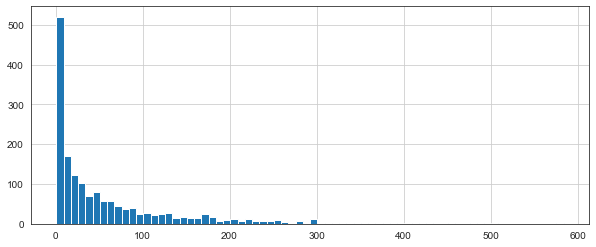

In [14]:
plt.figure(figsize = (10,4))
ratings['numOfRatings'].hist(bins = 70)

<AxesSubplot:>

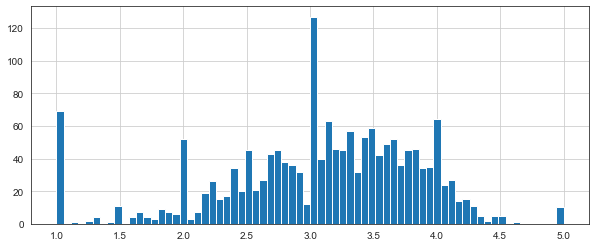

In [15]:
plt.figure(figsize = (10,4))
ratings['rating'].hist(bins = 70)

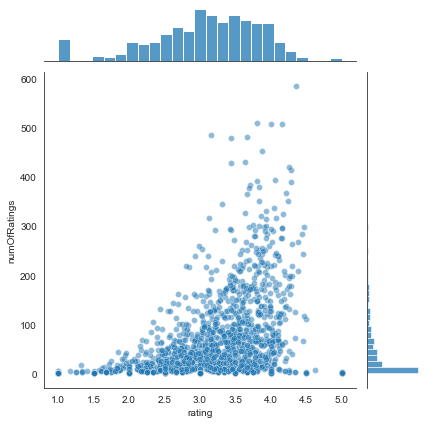

In [16]:
sns.jointplot(x='rating', y='numOfRatings', data = ratings, alpha = 0.5)


In [17]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
ratings.sort_values('numOfRatings', ascending = False).head(10)


,rating,numOfRatings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [ ]:
for i in ratings.index:
    movieUserRatings = moviemat[i]
    similarToThatMovie = moviemat.corrwith(movieUserRatings)
    corr_toMovie = pd.DataFrame(similarToThatMovie, columns = ['Correlation'])
    corr_toMovie.dropna(inplace = True)
    corr_toMovie = corr_toMovie.join(ratings['numOfRatings'])
    result = corr_toMovie[corr_toMovie['numOfRatings'] > 100].sort_values('Correlation', ascending = False).head()
    if result['numOfRatings'].count() >= 5:
        print(i)
        ratings.loc[i, 'FirstMovieRecommendation'] = result.iloc[1:2].index.values[0]
        ratings.loc[i, 'SecondMovieRecommendation'] = result.iloc[2:3].index.values[0]
        ratings.loc[i, 'ThirdMovieRecommendation'] = result.iloc[3:4].index.values[0]
        ratings.loc[i, 'FourthMovieRecommendation'] = result.iloc[4:5].index.values[0]

In [ ]:
ratings = ratings.fillna('-')

ratings.to_csv('MovieRecommendations.csv', encoding='utf-8')

In [ ]:
df_result = pd.read_csv('MovieRecommendations.csv')
df_result.head()

In [ ]:
for i in df_result['title']:
    print(i)

In [ ]:
inputMovieName = widgets.Text()

def getRecommendations(sender):
    searchMovie = inputMovieName.value
    list_result = df_result[df_result['title'] == searchMovie]
    fm = list_result['FirstMovieRecommendation'].values[0]
    sm = list_result['SecondMovieRecommendation'].values[0]
    tm = list_result['ThirdMovieRecommendation'].values[0]
    fourthm = list_result['FourthMovieRecommendation'].values[0]
    finalRecommendationText = '1:' + fm + ' \n2:' + sm + ' \n3:' + tm + ' \n4:' + fourthm
    print('Your Recommendations for the Movie ' + searchMovie + ' are:\n')
    print(finalRecommendationText)

In [ ]:
inputMovieName.on_submit(getRecommendations)
inputMovieName